# ★ Compression ★

# 11.1 The Discrete Cosine Transform

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct

## One-dimensional Discrete Cosine Transform

$C_{ij} = \frac{\sqrt{2}}{\sqrt{n}}\cos{\frac{i(2j+1)\pi}{2n}}$

for $i,j=0.\cdots,n-1$ where

$a_i \equiv \left\{\begin{matrix}
1/\sqrt{2} & \text{if } i = 0 \\ 
1 & \text{if } i = 1,\cdots,n-1 
\end{matrix}\right.$

or

$C = \sqrt{\frac{2}{n}}\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \cdots & \frac{1}{\sqrt{2}}\\ 
\cos{\frac{\pi}{2n}} & \cos{\frac{3\pi}{2n}} & \cdots & \cos{\frac{(2n-1)\pi}{2n}}\\ 
\cos{\frac{2\pi}{2n}} & \cos{\frac{6\pi}{2n}} & \cdots & \cos{\frac{2(2n-1)\pi}{2n}}\\
\vdots & \vdots &  & \vdots \\
\cos{\frac{(n-1)\pi}{2n}} & \cos{\frac{(n-1)3\pi}{2n}} & \cdots & \cos{\frac{(n-1)(2n-1)\pi}{2n}}
\end{bmatrix}$

In [2]:
def generate_dct_matrix(n):
    C = np.ones((n, n)) * (1/np.sqrt(2))
    for i in range(1, n):
        for j in range(n):
            C[i, j] = np.cos( (np.pi * i + i * j * 2 * np.pi) / (2 * n) )
    C *= np.sqrt(2 / n)
    return C

## Definition

The Discrete Cosine Transform (DCT) of 
$x = [x_0,\cdots,x_{n-1}]^T$ 
is the n-dimensional vector 
$y = [y_0,\cdots,y_{n-1}]^T$, 
where $y = Cx$

$C^{-1} = C^T = \sqrt{\frac{2}{n}}\begin{bmatrix}
\frac{1}{\sqrt{2}} & \cos{\frac{\pi}{2n}} & \cdots & \cos{\frac{(n-1)\pi}{2n}} \\ 
\frac{1}{\sqrt{2}} & \cos{\frac{3\pi}{2n}} & \cdots & \cos{\frac{(n-1)3\pi}{2n}}\\ 
\vdots & \vdots &  & \vdots \\
\frac{1}{\sqrt{2}} & \cos{\frac{2(n-1)\pi}{2n}} & \cdots & \cos{\frac{(n-1)(2n-1)\pi}{2n}}
\end{bmatrix}$

## DCT Interpolation Theorem

Let $x = [x_0,\cdots,x_{n-1}]^T$ be a vector of n real numbers
Define $y = [y_0,\cdots,y_{n-1}]^T = Cx$, where C is the Discrete Cosine Transform matrix of order n. Then the real function

$P_n(t) = \frac{1}{\sqrt{n}}y_0 + \frac{\sqrt{2}}{\sqrt{n}}\sum_{k=1}^{n-1}\cos{\frac{k(2t+1)\pi}{2n}}$

satisfies $P_n(j) = x_j$ for $j = 0,\cdots,n-1$

In [3]:
def dct_interpolation(ys, ts):
    n = ys.size
    P = lambda t, n, ys : ys[0] / np.sqrt(n) + np.sqrt(2 / n) * \
        np.sum([ys[k] * np.cos(k * (2 * t + 1) * np.pi / (2 * n)) for k in range(1, n)])
    Ps = np.empty(ts.size)
    for i in range(ts.size):
        Ps[i] = P(ts[i], n, ys)
    return Ps

## Example 

Use the DCT to interpolate the points (0,1), (1,0), (2,-1), (3,0)

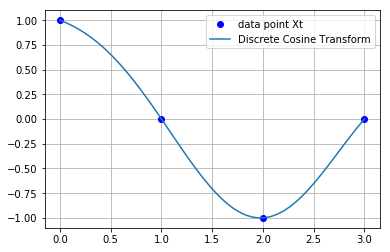

In [4]:
x = np.array([1, 0, -1, 0]).T
t = np.arange(0, 4)
C = generate_dct_matrix(4)
y = np.matmul(C, x)

ts = np.linspace(0, 3, 50)
Ps = dct_interpolation(y, ts)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps, label = 'Discrete Cosine Transform')
plt.legend()
plt.grid(True)
plt.show()

or use **scipy.fftpack.dct**

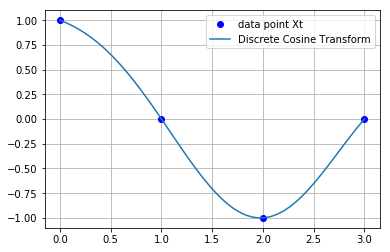

In [5]:
x = np.array([1, 0, -1, 0]).T
t = np.arange(0, 4)
y = dct(x, norm='ortho')

ts = np.linspace(0, 3, 50)
Ps = dct_interpolation(y, ts)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps, label = 'Discrete Cosine Transform')
plt.legend()
plt.grid(True)
plt.show()

## DCT Least Squares Approximation Theorem

Let $x = [x_0,\cdots,x_{n-1}]^T$ be a vector of n real numbers.
Define $y = [y_0,\cdots,y_{n-1}]^T = Cx$, where C is the Discrete Cosine Transform matrix.
Then, for any positive integer $m \le n$, the choice of coefficients $y_0,\cdots,y_{m-1}$ in

$P_m(t)=\frac{1}{\sqrt{n}}y_0+\frac{\sqrt{2}}{\sqrt{n}}\sum_{k=1}^{m-1}y_k\cos{\frac{k(2t+1)\pi}{2n}}$

minimizes the squared approximation error $\sum_{j=0}^{n-1}(P_m(j) - x_j)^2$ of the n data points.

In [6]:
def dct_least_squares(ys, ts, m):
    n = ys.size
    P = lambda t, n, ys, m : ys[0] / np.sqrt(n) + np.sqrt(2 / n) * \
        np.sum([ys[k] * np.cos(k * (2 * t + 1) * np.pi / (2 * n)) for k in range(1, m)])
    Ps = np.empty(ts.size)
    print([k for k in range(1, m)])
    for i in range(ts.size):
        Ps[i] = P(ts[i], n, ys, m)
    return Ps

## Example

Use the DCT and **DCT Least Squares Approximation Theorem** to find least squares fits to the data $t = 0,\cdots,7$ and $x = [-2.2,-2.8,-6.1,-3.9, 0.0, 1.1, -0.6, -1.1]^T$ for $m = 4, 6,\ and\ 8$

[1, 2, 3]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6, 7]


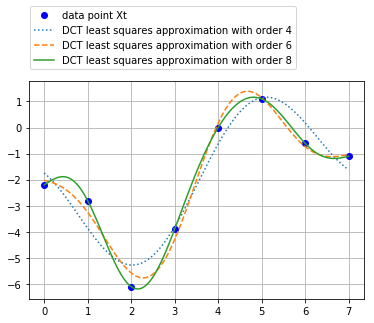

In [7]:
x = np.array([-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1]).T
m1, m2, m3 = 4, 6, 8
t = np.arange(0, 8)
C = generate_dct_matrix(8)
y = np.matmul(C, x)

ts = np.linspace(0, 7, 100)
Ps1 = dct_least_squares(y, ts, m1)
Ps2 = dct_least_squares(y, ts, m2)
Ps3 = dct_least_squares(y, ts, m3)

plt.plot(t, x, 'bo', label = 'data point Xt')
plt.plot(ts, Ps1, label = 'DCT least squares approximation with order 4', linestyle=':')
plt.plot(ts, Ps2, label = 'DCT least squares approximation with order 6', linestyle='--')
plt.plot(ts, Ps3, label = 'DCT least squares approximation with order 8')
plt.legend(bbox_to_anchor=(0, 1.05), loc=3, borderaxespad=0.1)
plt.grid(True)
plt.show()